In [38]:
# Importing Qiskit
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit

In [39]:
# Creating Quantum and Classical Registers
# This is another method to create registers.
quantum_register= QuantumRegister(1)
classical_register= ClassicalRegister(1)

In [40]:
# Creating a Quantum Circuit
quantum_circuit= QuantumCircuit(quantum_register, classical_register)

/home/chinmay/anaconda3/envs/PEP/lib/python3.11/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


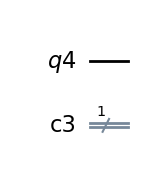

In [41]:
# To view the circuit
quantum_circuit.draw(output='mpl')

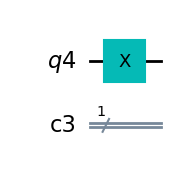

In [42]:
# Adding X Gate to the circuit
# The 0 indicates the 'q0' register
quantum_circuit.x(0)

# Draw the circuit again
quantum_circuit.draw(output='mpl')

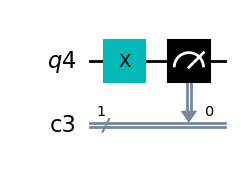

In [43]:
# Now we have to measure this to see how the gate works
# 0,0 defines quantum register 0 (q0) to classical register 0 (c0)
# If you use measure_all() you will no longer need the classical register.
quantum_circuit.measure(0,0)
quantum_circuit.draw(output='mpl')

In [44]:
from qiskit.providers.aer import Qas

ImportError: cannot import name 'Qas' from 'qiskit_aer' (/home/chinmay/anaconda3/envs/PEP/lib/python3.11/site-packages/qiskit_aer/__init__.py)

In [29]:
# As we can see, the circuit now has a X Gate. We can now measure the qubit at the quantum register.
# For this we have two methods, AER(quantum computer simulator) and IBM (IBM's quantum computer)
from qiskit.providers.aer import QasmSimulator
backend= QasmSimulator()
job = backend.run(quantum_circuit,shots=1024)
result = job.result()
# You will get a huge result, but we only care about the 'counts'
print(result)

Result(backend_name='qasm_simulator', backend_version='0.13.3', qobj_id='', job_id='b359df15-9b98-4727-bf52-cf89d8d54a22', success=True, results=[ExperimentResult(shots=1024, success=True, meas_level=2, data=ExperimentResultData(counts={'0x1': 1024}), header=QobjExperimentHeader(creg_sizes=[['c2', 1]], global_phase=0.0, memory_slots=1, n_qubits=1, name='circuit-154', qreg_sizes=[['q2', 1]], metadata={}), status=DONE, seed_simulator=4075558849, metadata={'time_taken': 0.002834816, 'num_bind_params': 1, 'parallel_state_update': 8, 'parallel_shots': 1, 'required_memory_mb': 0, 'input_qubit_map': [[0, 0]], 'method': 'stabilizer', 'device': 'CPU', 'num_qubits': 1, 'sample_measure_time': 0.000582091, 'active_input_qubits': [0], 'num_clbits': 1, 'remapped_qubits': False, 'runtime_parameter_bind': False, 'max_memory_mb': 23719, 'noise': 'ideal', 'measure_sampling': True, 'batched_shots_optimization': False, 'fusion': {'enabled': False}}, time_taken=0.002834816)], date=2024-02-12T10:21:25.27909

/tmp/ipykernel_276008/3404537584.py:3: DeprecationWarning: Importing from 'qiskit.providers.aer' is deprecated. Import from 'qiskit_aer' instead, which should work identically.
  from qiskit.providers.aer import QasmSimulator


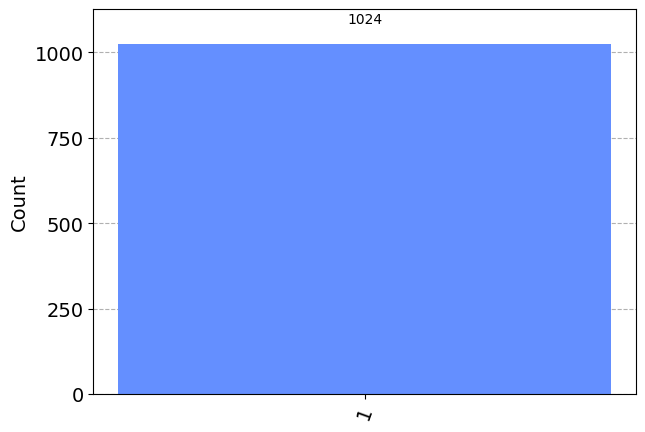

In [30]:
# We can plot a histogram to see the count values
from qiskit.visualization import plot_histogram
# This line of code below illustrates how to get counts from the output. 
#Note that you need to give the circuit name.
counts = result.get_counts(quantum_circuit)
plot_histogram(counts)

In [31]:
# Let us see the counts
print(counts)

{'1': 1024}


In [32]:
# All the tries have turned out to be 1, so the X Gate worked. The input 0 is turned into 1.

<h2>Now let us see the working of this circuit on a real quantum machine. <br/>
Note: You need to create an IBMQ account before proceeding.</h2>

In [36]:
from qiskit import IBMQ,execute

# This step is for first time users.
IBMQ.save_account('8d9fd4cfb1139b39e920a5e17a2d932dcf89a73f3c9441d31cf617139f3cb47ac4eb912c2ada92145a2c9bef7d5c22ca825b5cbe3a6590b599bbce8872f1d216')
# For this token, visit https://quantum-computing.ibm.com/ create an account with any email id
# and login to view the token and copy it.

/tmp/ipykernel_276008/106174153.py:4: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'
  IBMQ.save_account('8d9fd4cfb1139b39e920a5e17a2d932dcf89a73f3c9441d31cf617139f3cb47ac4eb912c2ada92145a2c9bef7d5c22ca825b5cbe3a6590b599bbce8872f1d216')


MissingOptionalLibraryError: "The 'qiskit-ibmq-provider' library is required to use 'IBMQ provider'. You can install it with 'pip install qiskit-ibmq-provider'."

In [6]:
# This step is after you have created and saved your account.
IBMQ.load_account()

# To view all the poviders

print([backend.name() for backend in IBMQ.providers()[0].backends()])

ibmqfactory.load_account:WARNING:2024-02-11 17:38:50,633: Credentials are already in use. The existing account in the session will be replaced.


['ibmq_qasm_simulator', 'simulator_statevector', 'simulator_mps', 'simulator_extended_stabilizer', 'simulator_stabilizer', 'ibm_brisbane', 'ibm_kyoto', 'ibm_osaka']


<h3>You can select from:<br/>
ibmq_lima<br/>
ibmq_belem<br/>
ibmq_quito<br/>
ibmq_manila</h3>

In [7]:
from qiskit.tools.monitor import job_monitor
provider = IBMQ.get_provider(hub = 'ibm-q',group = 'open',project='main')
backend = provider.get_backend('ibm_brisbane')
job = execute(quantum_circuit, backend=backend, shots=1000 )
job_monitor(job)
results = job.result()

QiskitBackendNotFoundError: 'No backend matches the criteria'

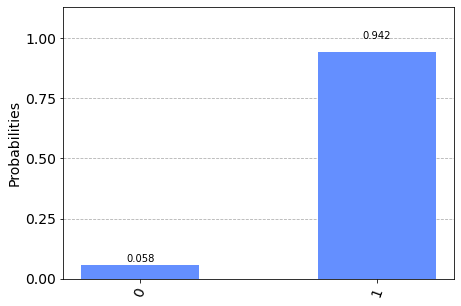

In [14]:
# Plot histogram of the outputs recieved.
counts = results.get_counts(quantum_circuit)
plot_histogram(counts)

In [37]:
pip freeze

anyio==4.2.0
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
arrow==1.3.0
asttokens==2.4.1
async-lru==2.0.4
attrs==23.2.0
Babel==2.14.0
beautifulsoup4==4.12.3
bleach==6.1.0
certifi==2023.11.17
cffi==1.16.0
charset-normalizer==3.3.2
comm==0.2.1
contourpy==1.2.0
cryptography==42.0.1
cycler==0.12.1
debugpy==1.8.0
decorator==5.1.1
defusedxml==0.7.1
dill==0.3.7
executing==2.0.1
fastjsonschema==2.19.1
fonttools==4.47.2
fqdn==1.5.1
idna==3.6
ipykernel==6.29.0
ipython==8.20.0
ipywidgets==8.1.1
isoduration==20.11.0
jedi==0.19.1
Jinja2==3.1.3
json5==0.9.14
jsonpointer==2.4
jsonschema==4.21.1
jsonschema-specifications==2023.12.1
jupyter-events==0.9.0
jupyter-lsp==2.2.2
jupyter_client==8.6.0
jupyter_core==5.7.1
jupyter_server==2.12.5
jupyter_server_terminals==0.5.2
jupyterlab==4.0.11
jupyterlab-widgets==3.0.9
jupyterlab_pygments==0.3.0
jupyterlab_server==2.25.2
kiwisolver==1.4.5
MarkupSafe==2.1.4
matplotlib==3.8.2
matplotlib-inline==0.1.6
mistune==3.0.2
mpmath==1.3.0
nbclient==0.9.0
nbconvert==7.